<a href="https://colab.research.google.com/github/dear-elia/climate-change-project/blob/main/arcticProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Extracting data from https://data.giss.nasa.gov/gistemp/

------------------------

https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv

Graphs -> Global Mean Surface Air Temperature Change (Global Mean Estimates based on Land and Ocean Data)-> open CSV file

In [37]:
url = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv"

Install the nessecary library for Web Scraping: BeautifulSoup

In [38]:
headers = {"User-Agent":"Chrome/114.0.0.0 Safari/537.36"}

req = requests.get(url, headers=headers)
soup = BeautifulSoup(req.text, "html.parser")

#Checking the webpage content
print(req.content)

b'"Land-Ocean Temperature Index (C)\n--------------------------------"\nYear,No_Smoothing,Lowess(5)\n1880,-0.17,-0.10\n1881,-0.09,-0.13\n1882,-0.11,-0.17\n1883,-0.18,-0.21\n1884,-0.28,-0.24\n1885,-0.34,-0.27\n1886,-0.32,-0.28\n1887,-0.37,-0.28\n1888,-0.17,-0.27\n1889,-0.11,-0.26\n1890,-0.36,-0.26\n1891,-0.23,-0.26\n1892,-0.28,-0.27\n1893,-0.32,-0.27\n1894,-0.31,-0.25\n1895,-0.23,-0.23\n1896,-0.12,-0.21\n1897,-0.12,-0.19\n1898,-0.29,-0.18\n1899,-0.19,-0.19\n1900,-0.10,-0.21\n1901,-0.17,-0.25\n1902,-0.29,-0.27\n1903,-0.38,-0.30\n1904,-0.49,-0.32\n1905,-0.28,-0.35\n1906,-0.24,-0.37\n1907,-0.40,-0.39\n1908,-0.44,-0.41\n1909,-0.50,-0.42\n1910,-0.45,-0.43\n1911,-0.45,-0.40\n1912,-0.37,-0.36\n1913,-0.36,-0.34\n1914,-0.17,-0.32\n1915,-0.15,-0.32\n1916,-0.37,-0.31\n1917,-0.47,-0.31\n1918,-0.31,-0.31\n1919,-0.29,-0.30\n1920,-0.28,-0.29\n1921,-0.20,-0.27\n1922,-0.29,-0.26\n1923,-0.27,-0.25\n1924,-0.28,-0.24\n1925,-0.23,-0.23\n1926,-0.11,-0.22\n1927,-0.22,-0.21\n1928,-0.20,-0.20\n1929,-0.37,-0.19\

In [39]:
htmltoString = str(soup)
htmltoString

'"Land-Ocean Temperature Index (C)\n--------------------------------"\nYear,No_Smoothing,Lowess(5)\n1880,-0.17,-0.10\n1881,-0.09,-0.13\n1882,-0.11,-0.17\n1883,-0.18,-0.21\n1884,-0.28,-0.24\n1885,-0.34,-0.27\n1886,-0.32,-0.28\n1887,-0.37,-0.28\n1888,-0.17,-0.27\n1889,-0.11,-0.26\n1890,-0.36,-0.26\n1891,-0.23,-0.26\n1892,-0.28,-0.27\n1893,-0.32,-0.27\n1894,-0.31,-0.25\n1895,-0.23,-0.23\n1896,-0.12,-0.21\n1897,-0.12,-0.19\n1898,-0.29,-0.18\n1899,-0.19,-0.19\n1900,-0.10,-0.21\n1901,-0.17,-0.25\n1902,-0.29,-0.27\n1903,-0.38,-0.30\n1904,-0.49,-0.32\n1905,-0.28,-0.35\n1906,-0.24,-0.37\n1907,-0.40,-0.39\n1908,-0.44,-0.41\n1909,-0.50,-0.42\n1910,-0.45,-0.43\n1911,-0.45,-0.40\n1912,-0.37,-0.36\n1913,-0.36,-0.34\n1914,-0.17,-0.32\n1915,-0.15,-0.32\n1916,-0.37,-0.31\n1917,-0.47,-0.31\n1918,-0.31,-0.31\n1919,-0.29,-0.30\n1920,-0.28,-0.29\n1921,-0.20,-0.27\n1922,-0.29,-0.26\n1923,-0.27,-0.25\n1924,-0.28,-0.24\n1925,-0.23,-0.23\n1926,-0.11,-0.22\n1927,-0.22,-0.21\n1928,-0.20,-0.20\n1929,-0.37,-0.19\n

In [40]:
splitting = htmltoString.split()
splitting

['"Land-Ocean',
 'Temperature',
 'Index',
 '(C)',
 '--------------------------------"',
 'Year,No_Smoothing,Lowess(5)',
 '1880,-0.17,-0.10',
 '1881,-0.09,-0.13',
 '1882,-0.11,-0.17',
 '1883,-0.18,-0.21',
 '1884,-0.28,-0.24',
 '1885,-0.34,-0.27',
 '1886,-0.32,-0.28',
 '1887,-0.37,-0.28',
 '1888,-0.17,-0.27',
 '1889,-0.11,-0.26',
 '1890,-0.36,-0.26',
 '1891,-0.23,-0.26',
 '1892,-0.28,-0.27',
 '1893,-0.32,-0.27',
 '1894,-0.31,-0.25',
 '1895,-0.23,-0.23',
 '1896,-0.12,-0.21',
 '1897,-0.12,-0.19',
 '1898,-0.29,-0.18',
 '1899,-0.19,-0.19',
 '1900,-0.10,-0.21',
 '1901,-0.17,-0.25',
 '1902,-0.29,-0.27',
 '1903,-0.38,-0.30',
 '1904,-0.49,-0.32',
 '1905,-0.28,-0.35',
 '1906,-0.24,-0.37',
 '1907,-0.40,-0.39',
 '1908,-0.44,-0.41',
 '1909,-0.50,-0.42',
 '1910,-0.45,-0.43',
 '1911,-0.45,-0.40',
 '1912,-0.37,-0.36',
 '1913,-0.36,-0.34',
 '1914,-0.17,-0.32',
 '1915,-0.15,-0.32',
 '1916,-0.37,-0.31',
 '1917,-0.47,-0.31',
 '1918,-0.31,-0.31',
 '1919,-0.29,-0.30',
 '1920,-0.28,-0.29',
 '1921,-0.20,-0.27'

**No_Smoothing:** This is the original data, exactly how it was collected. It can be bumpy and jump up and down a lot.

**Lowess (Smoothing):** This is a way to make the data look smoother and nicer. It helps you see the general trend without all the small jumps.

In [47]:
del splitting[0:6]
splitting

['1885,-0.34,-0.27',
 '1886,-0.32,-0.28',
 '1887,-0.37,-0.28',
 '1888,-0.17,-0.27',
 '1889,-0.11,-0.26',
 '1890,-0.36,-0.26',
 '1891,-0.23,-0.26',
 '1892,-0.28,-0.27',
 '1893,-0.32,-0.27',
 '1894,-0.31,-0.25',
 '1895,-0.23,-0.23',
 '1896,-0.12,-0.21',
 '1897,-0.12,-0.19',
 '1898,-0.29,-0.18',
 '1899,-0.19,-0.19',
 '1900,-0.10,-0.21',
 '1901,-0.17,-0.25',
 '1902,-0.29,-0.27',
 '1903,-0.38,-0.30',
 '1904,-0.49,-0.32',
 '1905,-0.28,-0.35',
 '1906,-0.24,-0.37',
 '1907,-0.40,-0.39',
 '1908,-0.44,-0.41',
 '1909,-0.50,-0.42',
 '1910,-0.45,-0.43',
 '1911,-0.45,-0.40',
 '1912,-0.37,-0.36',
 '1913,-0.36,-0.34',
 '1914,-0.17,-0.32',
 '1915,-0.15,-0.32',
 '1916,-0.37,-0.31',
 '1917,-0.47,-0.31',
 '1918,-0.31,-0.31',
 '1919,-0.29,-0.30',
 '1920,-0.28,-0.29',
 '1921,-0.20,-0.27',
 '1922,-0.29,-0.26',
 '1923,-0.27,-0.25',
 '1924,-0.28,-0.24',
 '1925,-0.23,-0.23',
 '1926,-0.11,-0.22',
 '1927,-0.22,-0.21',
 '1928,-0.20,-0.20',
 '1929,-0.37,-0.19',
 '1930,-0.16,-0.19',
 '1931,-0.10,-0.19',
 '1932,-0.16,

In [48]:
rows = [line.split(',') for line in splitting]
rows

[['1885', '-0.34', '-0.27'],
 ['1886', '-0.32', '-0.28'],
 ['1887', '-0.37', '-0.28'],
 ['1888', '-0.17', '-0.27'],
 ['1889', '-0.11', '-0.26'],
 ['1890', '-0.36', '-0.26'],
 ['1891', '-0.23', '-0.26'],
 ['1892', '-0.28', '-0.27'],
 ['1893', '-0.32', '-0.27'],
 ['1894', '-0.31', '-0.25'],
 ['1895', '-0.23', '-0.23'],
 ['1896', '-0.12', '-0.21'],
 ['1897', '-0.12', '-0.19'],
 ['1898', '-0.29', '-0.18'],
 ['1899', '-0.19', '-0.19'],
 ['1900', '-0.10', '-0.21'],
 ['1901', '-0.17', '-0.25'],
 ['1902', '-0.29', '-0.27'],
 ['1903', '-0.38', '-0.30'],
 ['1904', '-0.49', '-0.32'],
 ['1905', '-0.28', '-0.35'],
 ['1906', '-0.24', '-0.37'],
 ['1907', '-0.40', '-0.39'],
 ['1908', '-0.44', '-0.41'],
 ['1909', '-0.50', '-0.42'],
 ['1910', '-0.45', '-0.43'],
 ['1911', '-0.45', '-0.40'],
 ['1912', '-0.37', '-0.36'],
 ['1913', '-0.36', '-0.34'],
 ['1914', '-0.17', '-0.32'],
 ['1915', '-0.15', '-0.32'],
 ['1916', '-0.37', '-0.31'],
 ['1917', '-0.47', '-0.31'],
 ['1918', '-0.31', '-0.31'],
 ['1919', '-0.

In [49]:
#Creating DataFrame
df = pd.DataFrame(rows, columns=["Year", "No_Smoothing", "Lowess"])
df

,Year,No_Smoothing,Lowess
0,1885,-0.34,-0.27
1,1886,-0.32,-0.28
2,1887,-0.37,-0.28
3,1888,-0.17,-0.27
4,1889,-0.11,-0.26
...,...,...,...
135,2020,1.01,0.97
136,2021,0.85,1.03
137,2022,0.90,1.09
138,2023,1.18,1.14


Since I’m focusing on analyzing the raw data, I don’t need the Lowess column for now. Lowess is a smoothed version of the data, generated using a scatter plot smoothing technique that is often used in regression analysis.

In [50]:
#Deleting 'Lowess', axis=1 means drop columns

data = df.drop(columns=["Lowess"], axis=1)
data

,Year,No_Smoothing
0,1885,-0.34
1,1886,-0.32
2,1887,-0.37
3,1888,-0.17
4,1889,-0.11
...,...,...
135,2020,1.01
136,2021,0.85
137,2022,0.90
138,2023,1.18


In [51]:
#Renaming the column 'No_Smoothing'

data = data.rename(columns={'No_Smoothing': 'Global Surface Temperature'})
data

,Year,Global Surface Temperature
0,1885,-0.34
1,1886,-0.32
2,1887,-0.37
3,1888,-0.17
4,1889,-0.11
...,...,...
135,2020,1.01
136,2021,0.85
137,2022,0.90
138,2023,1.18


In [52]:
#To do math or plotting properly, i must convert it to an integer

data["Year"] = data["Year"].astype(int)
data['Global Surface Temperature'] = data['Global Surface Temperature'].astype(float)

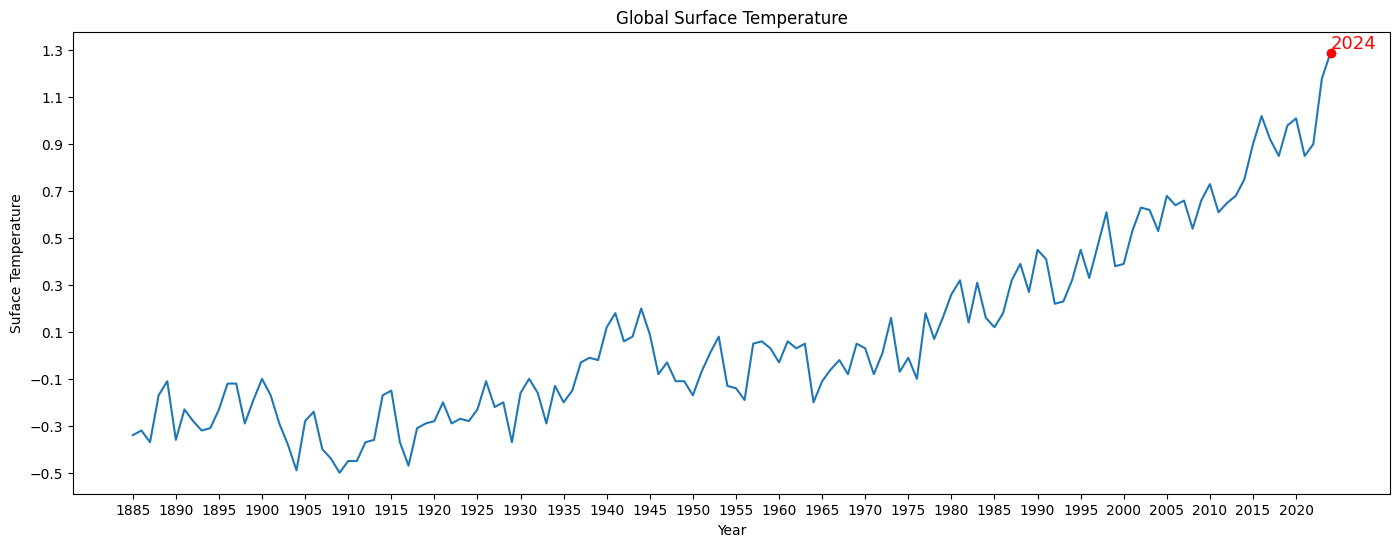

In [53]:

plt.figure(figsize=(17, 6))
plt.plot(data['Year'], data['Global Surface Temperature'])

# Get temperature for 2024
temp_2024 = data.loc[data['Year'] == 2024, 'Global Surface Temperature']
y_val = temp_2024.values[0]

# Add red marker
plt.scatter(2024, y_val, color='red', zorder=5)
plt.text(2024, y_val, '2024', color='red', fontsize=13, verticalalignment='bottom')

plt.xlabel('Year')
plt.ylabel('Suface Temperature')
plt.title('Global Surface Temperature')

#Set x-ticks every 10 years
plt.xticks(np.arange(data['Year'].min(), data['Year'].max() + 1, 5))

#Set y-ticks every 0.2 units
plt.yticks(np.arange(data['Global Surface Temperature'].min(),
                     data['Global Surface Temperature'].max() + 0.1,
                     0.2))


plt.show()

The graph shows a significant rise in surface temperature over the past 20 years.

**CARBON DIOXIDE ANALYSYS**



The data was obtained from NASA’s official website: https://climate.nasa.gov/vital-signs/carbon-dioxide/?intent=111

I saved the data in a .txt file for further analysis.

I used **pandas.read_csv()** to automatically load the space-separated .txt file into a DataFrame. Since the values are separated by spaces, not tabs, I specified **delim_whitespace=True** to correctly parse the columns.

In [54]:
import pandas as pd

#Read the space-separated file without headers
df = pd.read_csv("/content/drive/MyDrive/data_analysis_dataset/carbondioxide.txt", delim_whitespace=True, header=None)
df

/tmp/ipython-input-54-2662019826.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("/content/drive/MyDrive/data_analysis_dataset/carbondioxide.txt", delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
802,2025,1,2025.0417,426.65,426.35,29,0.62,0.22
803,2025,2,2025.1250,427.09,426.15,24,0.64,0.25
804,2025,3,2025.2083,428.15,426.69,27,1.13,0.41
805,2025,4,2025.2917,429.64,427.13,23,0.73,0.29


**Preprocessing Step-by-Step Instructions:**

1. Select the necessary columns for further analysis: **Column 0 (Year)** and **Column 3 (Monthly average atmospheric CO₂ levels)**.
2. **Clean the data** by removing or correcting any invalid or missing rows.
3. Use the cleaned data to **plot a graph** representing the changes in CO₂ levels over time.

In [55]:
#Select columns 0 and 3 and save into a new DataFrame
df_new = df[[0, 3]]
df_new.head(13)

,0,3
0,1958,315.71
1,1958,317.45
2,1958,317.51
3,1958,317.27
4,1958,315.87
5,1958,314.93
6,1958,313.21
7,1958,312.42
8,1958,313.33
9,1958,314.67


I want to calculate the average CO₂ level for each year, but first I will exclude the year 1958, as it does not contain data for all 12 months and is therefore incomplete.

In [56]:
df_new2 = df_new[df_new[0] != 1958]
df_new2

,0,3
10,1959,315.58
11,1959,316.49
12,1959,316.65
13,1959,317.72
14,1959,318.29
...,...,...
802,2025,426.65
803,2025,427.09
804,2025,428.15
805,2025,429.64


In [57]:
df_new2.columns = ['Year', 'Average']
df_new2

,Year,Average
10,1959,315.58
11,1959,316.49
12,1959,316.65
13,1959,317.72
14,1959,318.29
...,...,...
802,2025,426.65
803,2025,427.09
804,2025,428.15
805,2025,429.64


In [58]:
df_final_data = df_new2.groupby('Year')['Average'].mean().reset_index()
df_final_data

,Year,Average
0,1959,315.981667
1,1960,316.908333
2,1961,317.643333
3,1962,318.453333
4,1963,318.992500
...,...,...
62,2021,416.414167
63,2022,418.528333
64,2023,421.075833
65,2024,424.604167


In [59]:
df_final_data['Average'] = df_final_data['Average'].round(2)
df_final_data

,Year,Average
0,1959,315.98
1,1960,316.91
2,1961,317.64
3,1962,318.45
4,1963,318.99
...,...,...
62,2021,416.41
63,2022,418.53
64,2023,421.08
65,2024,424.60


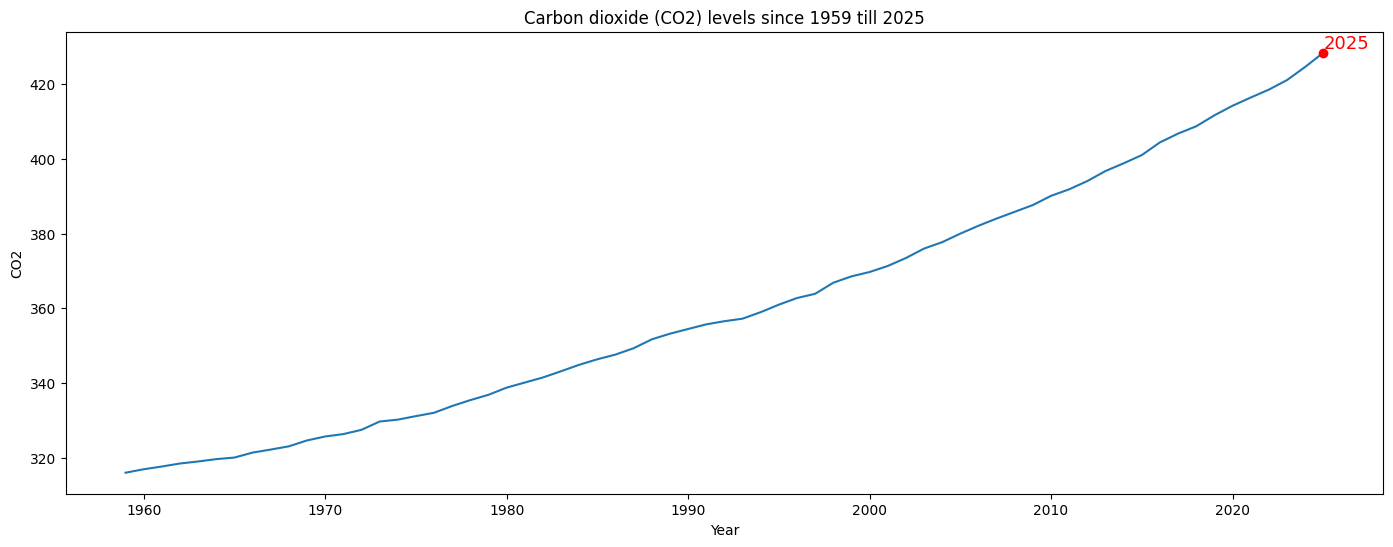

In [60]:

plt.figure(figsize=(17, 6))
plt.plot(df_final_data['Year'], df_final_data['Average'])

#Get avg for 2025
avg_2025 = df_final_data.loc[df_final_data['Year'] == 2025, 'Average']
y_val = avg_2025.values[0]

#Add red marker
plt.scatter(2025, y_val, color='red', zorder=5)
plt.text(2025, y_val, '2025', color='red', fontsize=13, verticalalignment='bottom')

plt.xlabel('Year')
plt.ylabel('CO2')
plt.title('Carbon dioxide (CO2) levels since 1959 till 2025')

plt.show()

**Artic Ice Extent and area analysis**

Sea ice analysis data was obtained from the National Snow and Ice Data Center (NSIDC) website:
🔗 https://nsidc.org/sea-ice-today/sea-ice-tools#anchor-sea-ice-extent-spatial-comparison-tool

📂 File name: Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx

📊 Data content: **Sea ice extent and area, organized by year and month**

📡 **Source: Satellite observations from NSIDC/NASA**

In the context of the Arctic and sea ice, the terms **NH-Extent** and **NH-Area** refer to two different ways of measuring the amount of sea ice

**NH-Extent (Northern Hemisphere Sea Ice Extent)**: the total area of the Arctic Ocean and nearby seas that have at least 15% sea ice concentration.
It shows the overall spread of the sea ice, regardless of how thick or complete it is.
***NH-Extent = “Where ice is present?”***

**NH-Area (Northern Hemisphere Sea Ice Area):** the actual physical area covered by sea ice — taking into account how much of each grid cell is ice.
If one square has 50% ice, only half of that square is counted. It’s a more precise measurement of actual ice coverage
***NH-Area = “How much ice is actually there?”***

In [62]:
#Import first Ice extent

import pandas as pd
df_ice_extent = pd.read_excel("/content/drive/MyDrive/data_analysis_dataset/Sea_Ice_Index_by_year.xlsx")
df_ice_extent.head()

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 13,Annual
0,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.645,13.667,NaN,12.673
1,1979,15.414,16.175,16.342,15.447,13.857,12.530,10.311,8.041,7.051,8.748,10.943,13.336,NaN,12.328
2,1980,14.862,15.955,16.041,15.429,13.793,12.205,10.100,7.984,7.667,9.183,11.383,13.593,NaN,12.337
3,1981,14.910,15.604,15.632,15.010,13.802,12.430,10.271,7.844,7.138,8.856,10.929,13.341,NaN,12.127
4,1982,15.177,15.974,16.044,15.466,13.973,12.476,10.367,8.139,7.302,9.421,11.627,13.642,NaN,12.447


As 1978 is not fully complete, let's not consider this row

In [63]:
# Exclude the first row where 1978 year
condition = df_ice_extent['Unnamed: 0'] != 1978
df_extent_new = df_ice_extent[condition]
df_extent_new.head()

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 13,Annual
1,1979,15.414,16.175,16.342,15.447,13.857,12.530,10.311,8.041,7.051,8.748,10.943,13.336,NaN,12.328
2,1980,14.862,15.955,16.041,15.429,13.793,12.205,10.100,7.984,7.667,9.183,11.383,13.593,NaN,12.337
3,1981,14.910,15.604,15.632,15.010,13.802,12.430,10.271,7.844,7.138,8.856,10.929,13.341,NaN,12.127
4,1982,15.177,15.974,16.044,15.466,13.973,12.476,10.367,8.139,7.302,9.421,11.627,13.642,NaN,12.447
5,1983,14.942,16.006,16.085,15.172,13.491,12.296,10.570,8.186,7.395,9.334,11.461,13.299,NaN,12.332


Scientists utilize the **September Arctic sea ice extent as a crucial indicator of climate change**, specifically focusing on the minimum extent reached each year during that month. This minimum extent, representing the smallest area covered by sea ice during the annual melt season, is a key metric for understanding the health and stability of the Arctic ice pack.

So, **September and March** are when the minimum and maximum extent typically occur each year.

In [64]:
#We need two columns: year and minimum extent in September

df_extent_new = df_extent_new[['Unnamed: 0', 'September']]
df_extent_new.head()

,Unnamed: 0,September
1,1979,7.051
2,1980,7.667
3,1981,7.138
4,1982,7.302
5,1983,7.395


In [65]:
#Now we need to round the extent rate

df_extent_new['September'] = df_extent_new['September'].round(2)
df_extent_new.head()

,Unnamed: 0,September
1,1979,7.05
2,1980,7.67
3,1981,7.14
4,1982,7.30
5,1983,7.40


Now we need to consider **NH-Area (Northern Hemisphere Sea Ice Area)**: the actual physical area covered by sea ice

In [66]:
#Import first Ice Area

import pandas as pd
df_ice_area = pd.read_excel("/content/drive/MyDrive/data_analysis_dataset/Sea_Ice_area.xlsx")
df_ice_area.head()

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 13,Annual
0,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.037,10.901,NaN,9.984
1,1979,12.406,13.181,13.208,12.528,11.109,9.344,6.692,5.056,4.583,6.189,8.367,10.633,NaN,9.418
2,1980,11.938,12.901,12.990,12.522,10.964,9.003,6.535,4.938,4.871,6.495,8.727,10.781,NaN,9.376
3,1981,11.907,12.533,12.714,12.239,10.991,9.029,6.313,4.477,4.439,6.265,8.313,10.543,NaN,9.126
4,1982,12.192,12.868,13.066,12.630,11.169,9.460,6.870,5.003,4.435,6.670,9.059,10.879,NaN,9.504


In [67]:
#Delete first incomplete row and choose only 2 columns

condition = df_ice_area['Unnamed: 0'] != 1978
df_area_new = df_ice_area[condition]

df_area_new = df_area_new[['Unnamed: 0', 'September']]

df_area_new['September'] = df_area_new['September'].round(2)
df_area_new.head()

,Unnamed: 0,September
1,1979,4.58
2,1980,4.87
3,1981,4.44
4,1982,4.43
5,1983,4.70


Now, we need to join the extent and area rates all togehter

In [68]:
merged_df = pd.merge(df_extent_new, df_area_new, on='Unnamed: 0')
merged_df.head()


,Unnamed: 0,September_x,September_y
0,1979,7.05,4.58
1,1980,7.67,4.87
2,1981,7.14,4.44
3,1982,7.30,4.43
4,1983,7.40,4.70


In [69]:
#let's rename the columns

merged_df.columns = ['Year', 'September_Extent', 'September_Area']
merged_df.head()

,Year,September_Extent,September_Area
0,1979,7.05,4.58
1,1980,7.67,4.87
2,1981,7.14,4.44
3,1982,7.30,4.43
4,1983,7.40,4.70


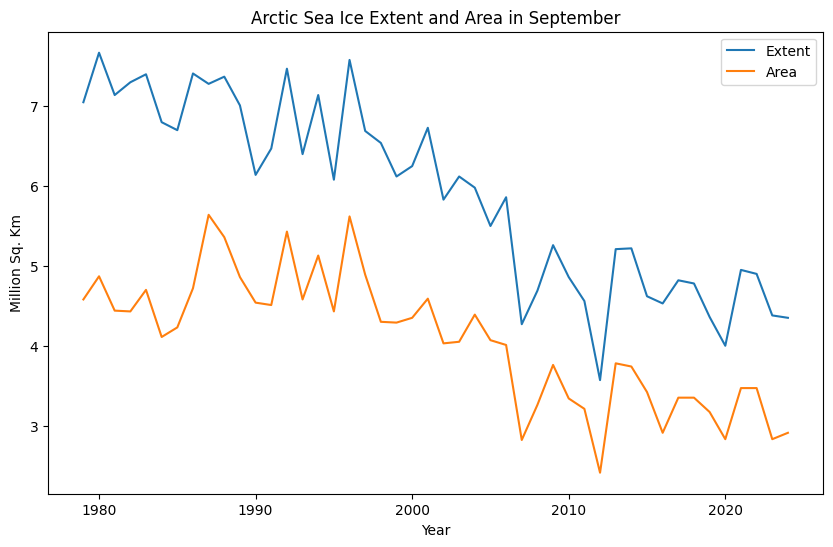

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(merged_df['Year'], merged_df['September_Extent'], label='Extent')
plt.plot(merged_df['Year'], merged_df['September_Area'], label='Area')

plt.title('Arctic Sea Ice Extent and Area in September')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Million Sq. Km')
plt.show()

In [71]:
data.head()

,Year,Global Surface Temperature
0,1885,-0.34
1,1886,-0.32
2,1887,-0.37
3,1888,-0.17
4,1889,-0.11


In [72]:
df_final_data.head()

,Year,Average
0,1959,315.98
1,1960,316.91
2,1961,317.64
3,1962,318.45
4,1963,318.99


In [74]:
data.head()

,Year,Global Surface Temperature
0,1885,-0.34
1,1886,-0.32
2,1887,-0.37
3,1888,-0.17
4,1889,-0.11


1. Surface Temperature dataframe starts from 1885: data
2. CO2's dataframe starts from 1959: df_final_data
3. Ice Extent and Area's dataframe starts from 1979

So, we need somehow to merge these 3 dataframes

In [79]:
def merge_three_dataframes(df1,df2,df3):

  condition = (df1['Year'] >= 1979)
  df1 = df1[condition]

  condition =(df2['Year'] >= 1979)
  df2 = df2[condition]

  merged_df = pd.merge(df1, df2,  on='Year')
  merged_df2 = pd.merge(merged_df, df3, on='Year')

  return merged_df2


In [80]:
merge_function = merge_three_dataframes(data, df_final_data, merged_df)
merge_function.head()

,Year,Global Surface Temperature,Average,September_Extent,September_Area
0,1979,0.16,336.84,7.05,4.58
1,1980,0.26,338.76,7.67,4.87
2,1981,0.32,340.12,7.14,4.44
3,1982,0.14,341.48,7.30,4.43
4,1983,0.31,343.15,7.40,4.70


In [81]:
#I want to rename the columns

merge_function.columns = ['Year', 'Surface Temperature', 'CO2 Average', 'Ice Extent', 'Ice Area']
merge_function.head()

,Year,Surface Temperature,CO2 Average,Ice Extent,Ice Area
0,1979,0.16,336.84,7.05,4.58
1,1980,0.26,338.76,7.67,4.87
2,1981,0.32,340.12,7.14,4.44
3,1982,0.14,341.48,7.30,4.43
4,1983,0.31,343.15,7.40,4.70


I plan to use the **Seaborn library** to explore and visualize correlations between the variables in my dataset: Surface Temperature, Average CO₂ levels, Ice Extent, and Ice Area.

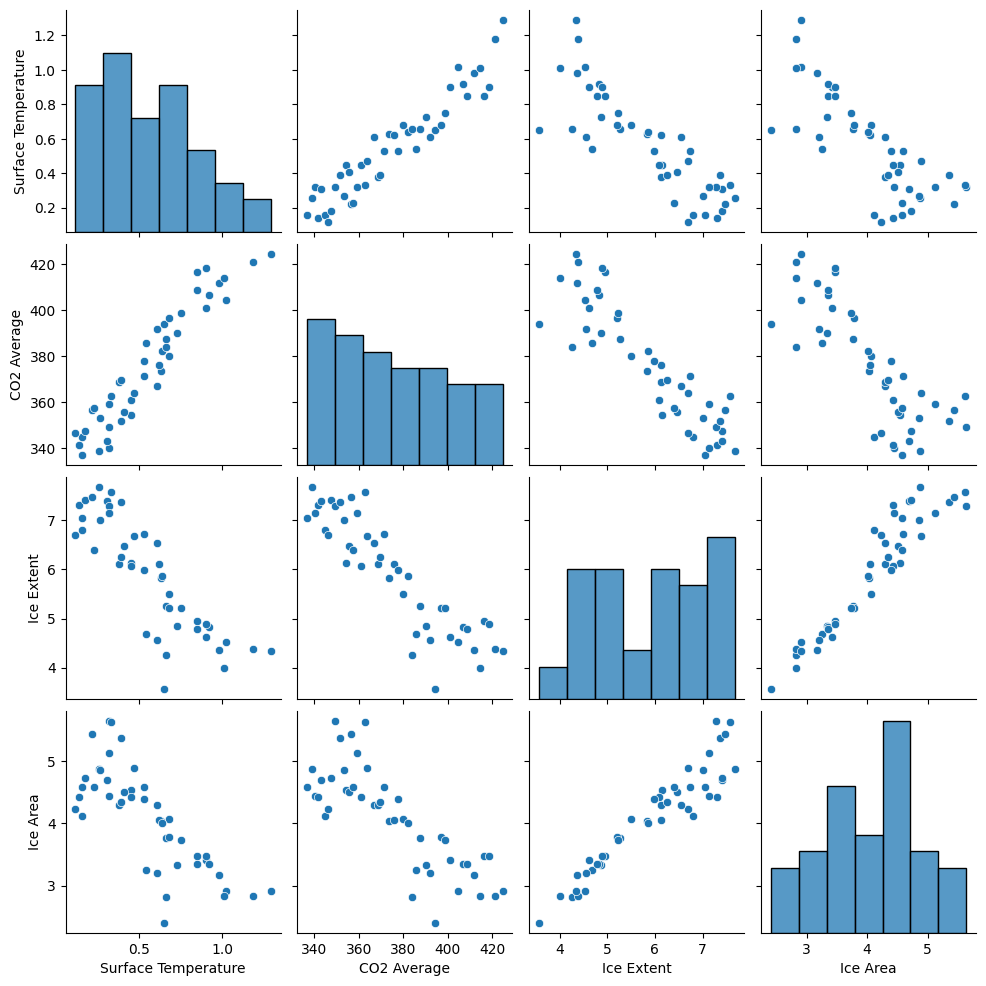

In [82]:
import seaborn as sns

sns.pairplot(merge_function.drop('Year', axis=1))
plt.show()

Surface Temperature and CO₂ have a positive correlation (scatter plt go upward from left to right):
When CO₂ levels increase, Surface Temperature tends to increase too. Ice Extent and CO₂ have a negative correlation: When CO₂ levels increase, Ice Extent tends to decrease (less ice).

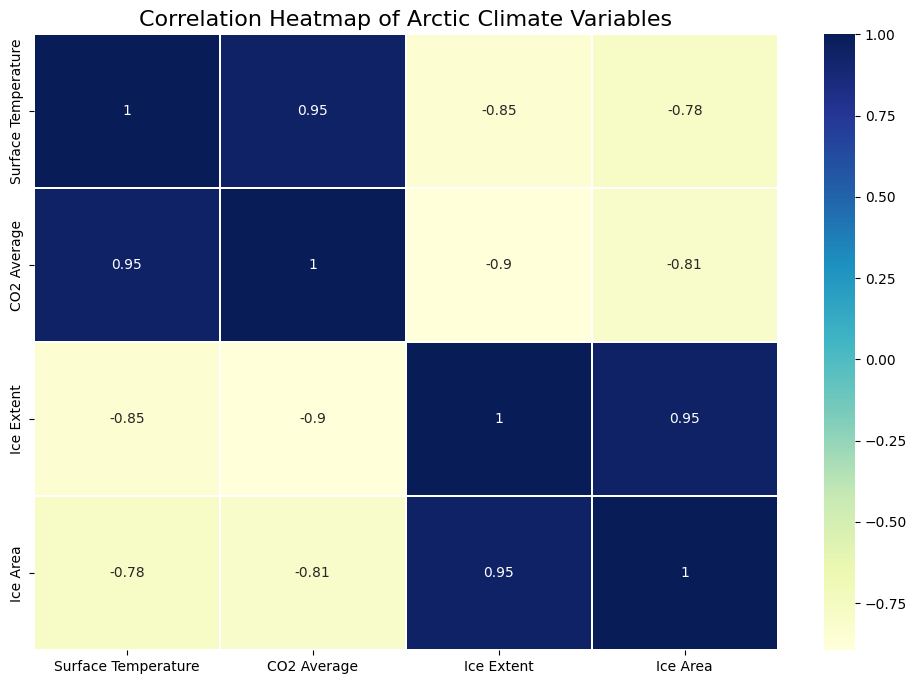

In [85]:
plt.figure(figsize=(12, 8))


sns.heatmap(
    merge_function.drop('Year', axis=1).corr(),
    cmap="YlGnBu",
    annot=True,
    linewidths=0.3
)

plt.title("Correlation Heatmap of Arctic Climate Variables", fontsize=16)
plt.show()

In [86]:
merge_function.head()

,Year,Surface Temperature,CO2 Average,Ice Extent,Ice Area
0,1979,0.16,336.84,7.05,4.58
1,1980,0.26,338.76,7.67,4.87
2,1981,0.32,340.12,7.14,4.44
3,1982,0.14,341.48,7.30,4.43
4,1983,0.31,343.15,7.40,4.70


 Let's build a small **Linear Regression model** to predict Global Surface Temperature Change based on features like CO₂ levels, ice extent, and ice area.

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Split DataFrame
x = merge_function.drop(['Year', 'Surface Temperature'], axis=1)
y = merge_function['Surface Temperature']

#Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#fit the scaler only on training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [90]:
#train the model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

#predict
y_pred = model.predict(x_test_scaled)

#let's evaluate
print("R² Score:", model.score(x_test_scaled, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9237117947201174
MSE: 0.007853023086838577
RMSE: 0.08861728435716464


A model tries to explain how much of Surface temperature ups and downs can be predicted just from the factors you included (C02, Ice Extent and Area...)

92.4% means:
If you look at all the changes in temperature, your model can explain about 92 out of 100 parts of those changes based on CO₂, ice area, and ice extent.
The remaining 7.6% are changes the model cannot explain, due to some factors


**What is MSE (Mean Squared Error)?**
It’s a number that tells you how close your model’s predictions are to the actual data.
The smaller the MSE, the better your model’s predictions.

**RMSE** tells you, on average, how much your model’s prediction differs from the actual temperature in °C.
So, if RMSE = 0.0886, it means your model’s predictions are off by about 0.0886 degrees Celsius on average.
Is that good or bad?
An error of **~0.08°C is very small — model is very accurate!**